In [42]:
import joblib

# Logistic Regression

In [43]:
log_reg_first_ver = joblib.load("Models/default_log_reg_first_ver.pkl") 

In [44]:
import numpy as np

X_train = np.genfromtxt("Data/X_train.csv", delimiter=',')
y_train = np.genfromtxt("Data/y_train.csv", delimiter=',')

In [45]:
from sklearn.model_selection import cross_val_score

In [46]:
cross_val_score(log_reg_first_ver, X_train, y_train, cv=3, scoring="accuracy")

array([0.77606264, 0.78389262, 0.77360179])

In [47]:
from sklearn.model_selection import cross_val_predict

In [48]:
y_train_pred = cross_val_predict(log_reg_first_ver, X_train, y_train, cv=3)

In [49]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

In [50]:
confusion_matrix(y_train, y_train_pred)

array([[9225,  856],
       [2123, 1206]], dtype=int64)

In [51]:
precision_score(y_train, y_train_pred)

0.5848690591658584

In [52]:
recall_score(y_train, y_train_pred)

0.3622709522379093

In [53]:
from sklearn.metrics import f1_score

In [54]:
f1_score(y_train, y_train_pred)

0.44741235392320533

In [55]:
from sklearn.metrics import precision_recall_curve

In [56]:
y_scores = cross_val_predict(log_reg_first_ver, X_train, y_train, cv=3, method="predict_proba")

In [57]:
y_scores

array([[0.44662861, 0.55337139],
       [0.87901566, 0.12098434],
       [0.22365881, 0.77634119],
       ...,
       [0.95106105, 0.04893895],
       [0.13183809, 0.86816191],
       [0.92419541, 0.07580459]])

In [58]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores[:, 1])

In [64]:
f1 = (2 * precisions * recalls)/(precisions + recalls)

In [59]:
import matplotlib.pyplot as plt

In [65]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds, f1):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.plot(thresholds, f1[:-1], "r--", label="F1")

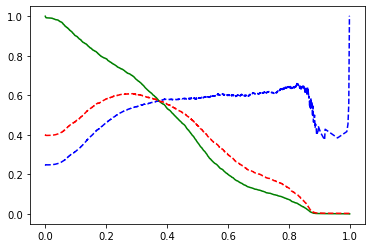

In [66]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds, f1)

In [68]:
THRESHOLD = thresholds[np.argmax(f1[:-1])]
THRESHOLD

0.28518547915638187

In [69]:
preds = np.where(log_reg_first_ver.predict_proba(X_train)[:,1] > THRESHOLD, 1, 0)

In [76]:
import pandas as pd

In [79]:
from sklearn.metrics import accuracy_score

In [81]:
pd.DataFrame(data=[accuracy_score(y_train, preds),
                   recall_score(y_train, preds),
                   precision_score(y_train, preds),
                   f1_score(y_train, preds)], 
             index=["accuracy", "recall", "precision", "f1_score"])

,0
accuracy,0.786353
recall,0.718234
precision,0.553729
f1_score,0.625343


### Test set

# SGD Classfier

In [21]:
sgd_clf = joblib.load("Models/sgd_clf.pkl")

In [22]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.75369128, 0.76577181, 0.77091723])

In [23]:
y_train_sgd_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [24]:
confusion_matrix(y_train, y_train_sgd_pred)

array([[8723, 1358],
       [1857, 1472]], dtype=int64)

In [25]:
f1_score(y_train, y_train_sgd_pred)

0.4779996752719597

In [26]:
y_sgd_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=3, method="decision_function")

In [27]:
sgd_precisions, sgd_recalls, sgd_thresholds = precision_recall_curve(y_train, y_sgd_scores)

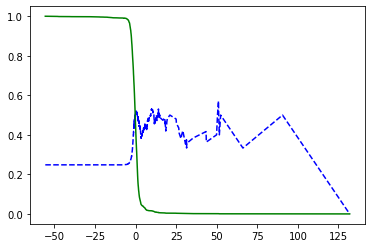

In [28]:
plot_precision_recall_vs_threshold(sgd_precisions, sgd_recalls, sgd_thresholds)

In [29]:
threshold_selected = thresholds[np.argmax(sgd_precisions >= 0.5)]

In [30]:
threshold_selected

-0.4446256459429275

In [31]:
y_sgd_train_pred_final = (y_sgd_scores >= threshold_selected)

In [32]:
f1_score(y_train, y_sgd_train_pred_final)

0.51892346509672